In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BTC-USD(1)-5year.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-07,903.487000,908.585022,823.556030,908.585022,908.585022,279550016
1,2017-01-08,908.174988,942.723999,887.249023,911.198975,911.198975,158715008
2,2017-01-09,913.244019,913.685974,879.807007,902.828003,902.828003,141876992
3,2017-01-10,902.440002,914.872986,901.059998,907.679016,907.679016,115808000
4,2017-01-11,908.114990,919.447998,762.765015,777.757019,777.757019,310928992


In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(1827, 7)

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,15644.242979,16072.802578,15173.115305,15664.319233,15664.319233,2.120644e+10
std,17061.484624,17526.956422,16521.798766,17064.090826,17064.090826,2.117641e+10
min,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07
25%,5612.299805,5801.653809,5475.665039,5635.375000,5635.375000,4.652720e+09
50%,8689.746094,8871.753906,8471.212891,8706.245117,8706.245117,1.661073e+10
75%,14479.649903,15361.799805,13658.300293,14600.950195,14600.950195,3.278167e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


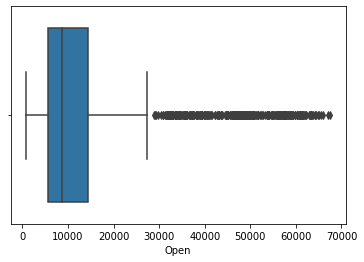

In [5]:
#outliers
from matplotlib import pyplot as plt
import seaborn as sns

sns.boxplot(x='Open',data=data)

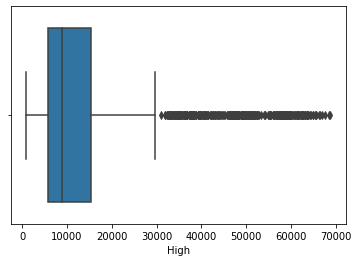

In [ ]:
sns.boxplot(x='High',data=data)

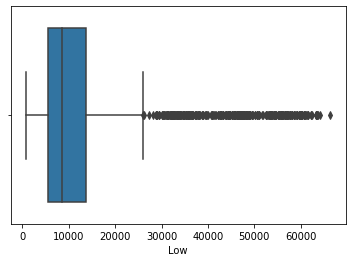

In [ ]:
sns.boxplot(x='Low',data=data)


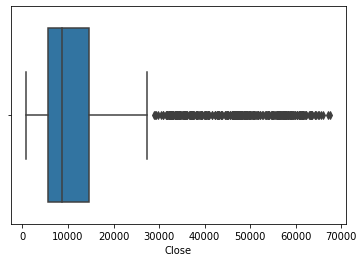

In [ ]:
sns.boxplot(x='Close',data=data)

In [ ]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3 - Q1
IQR

Open         8.867350e+03
High         9.560146e+03
Low          8.182635e+03
Close        8.965575e+03
Adj Close    8.965575e+03
Volume       2.812895e+10
dtype: float64

In [ ]:
# print( data < (Q1 - IQR) or data > (Q3 + IQR))

In [ ]:
maxThresholdOpen= data['Open'].quantile(0.79) 
avgOpen  = data['Open'].quantile(0.75)
print(maxThresholdOpen)
print(avgOpen)

22982.873788859986
14479.649902500001


In [ ]:
data[data['Open']>maxThresholdOpen]

,Date,Open,High,Low,Close,Adj Close,Volume
1442,2020-12-19,23132.865234,24085.855469,22826.472656,23869.832031,23869.832031,38487546580
1443,2020-12-20,23861.765625,24209.660156,23147.710938,23477.294922,23477.294922,37844228422
1444,2020-12-21,23474.455078,24059.982422,22159.367188,22803.082031,22803.082031,45852713981
1446,2020-12-23,23781.974609,24024.490234,22802.646484,23241.345703,23241.345703,51146161904
1447,2020-12-24,23240.203125,23768.337891,22777.597656,23735.949219,23735.949219,41080759713
...,...,...,...,...,...,...,...
1822,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
1823,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
1824,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
1825,2022-01-06,43565.511719,43748.718750,42645.539063,43160.929688,43160.929688,30208048289


In [ ]:
data['Open'] = np.where(data['Open'] > maxThresholdOpen,avgOpen,data['Open'])

In [ ]:
data['Open'].describe()

count     1827.000000
mean      8876.916715
std       4532.445924
min        775.177979
25%       5612.299805
50%       8689.746094
75%      14425.224854
max      22806.796875
Name: Open, dtype: float64

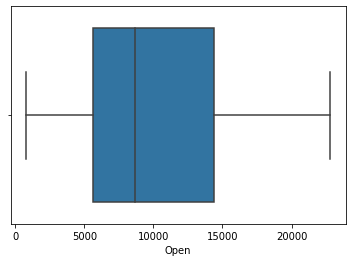

In [ ]:
sns.boxplot(x='Open',data=data)

#High


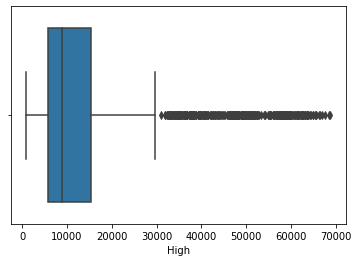

In [ ]:
sns.boxplot(x='High',data=data)

In [ ]:
maxThresholdHigh= data['High'].quantile(0.79) 
avgHigh  = data['High'].quantile(0.75)
print(maxThresholdHigh)
print(avgHigh)

23779.982695619998
15361.7998045


In [ ]:
data['High'] = np.where(data['High'] > maxThresholdHigh,avgHigh,data['High'])

In [ ]:
data['High'].describe()

count     1827.000000
mean      9210.815953
std       4800.275864
min        823.307007
25%       5801.653809
50%       8871.753906
75%      15320.399902
max      23768.337891
Name: High, dtype: float64

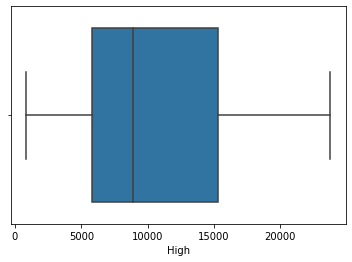

In [ ]:
sns.boxplot(x='High',data=data)

#Low


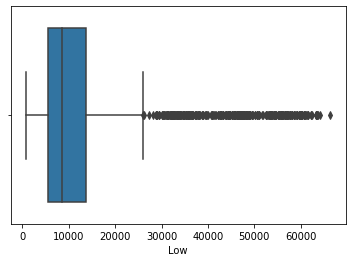

In [ ]:
sns.boxplot(x='Low',data=data)

In [ ]:
maxThresholdLow= data['Low'].quantile(0.79) 
avgLow  = data['Low'].quantile(0.75)
print(maxThresholdLow)
print(avgLow)

22416.44070326
13658.300293


In [ ]:
data['Low'] = np.where(data['Low'] > maxThresholdLow,avgLow,data['Low'])
data['Low'].describe()

count     1827.000000
mean      8551.170542
std       4281.268397
min        755.755981
25%       5475.665039
50%       8471.212891
75%      13650.000244
max      22399.812500
Name: Low, dtype: float64

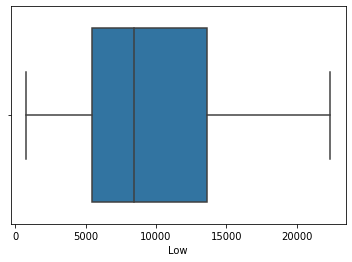

In [ ]:
sns.boxplot(x='Low',data=data)

#Close

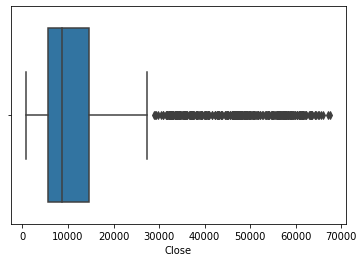

In [ ]:
sns.boxplot(x='Close',data=data)

In [ ]:
maxThresholdClose= data['Close'].quantile(0.79) 
avgClose = data['Close'].quantile(0.75)
print(maxThresholdClose)
print(avgClose)

23193.788711099995
14600.9501955


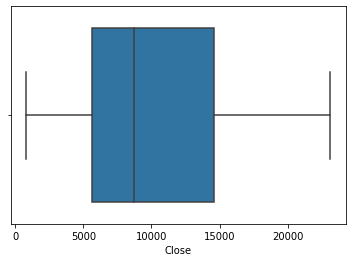

In [ ]:
data['Close'] = np.where(data['Close'] > maxThresholdClose,avgClose,data['Close'])
data['Close'].describe()
sns.boxplot(x='Close',data=data)

#Adj Close and Volume


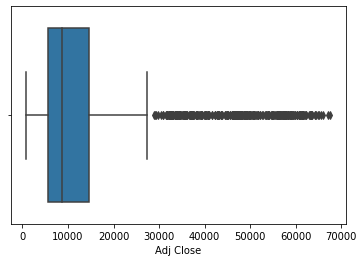

In [ ]:
sns.boxplot(x='Adj Close',data=data)

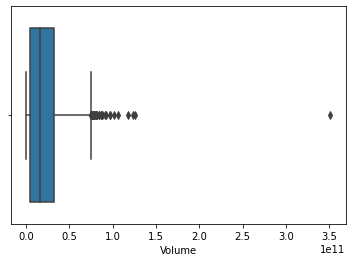

In [ ]:
sns.boxplot(x='Volume',data=data)

In [ ]:
maxThresholdAdjClose= data['Adj Close'].quantile(0.79) 
avgAdjClose = data['Adj Close'].quantile(0.75)
print(maxThresholdAdjClose)
print(avgAdjClose)

23193.788711099995
14600.9501955


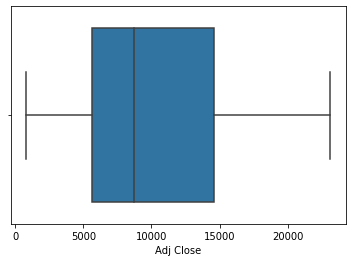

In [ ]:
data['Adj Close'] = np.where(data['Adj Close'] > maxThresholdAdjClose,avgAdjClose,data['Adj Close'])
data['Adj Close'].describe()
sns.boxplot(x='Adj Close',data=data)

In [ ]:
maxThresholdVolume= data['Volume'].quantile(0.79) 
avgVolume = data['Volume'].quantile(0.75)
print(maxThresholdVolume)
print(avgVolume)

35645521332.51999
32781672711.0


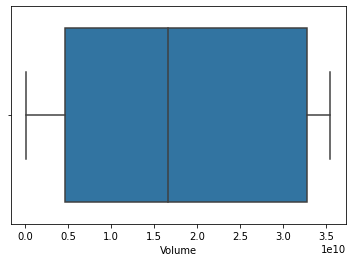

In [ ]:
data['Volume'] = np.where(data['Volume'] > maxThresholdVolume,avgVolume,data['Volume'])
data['Volume'].describe()
sns.boxplot(x='Volume',data=data)

In [ ]:
from google.colab import files
data.to_csv('CleanedData.csv')
files.download("CleanedData.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>